# Explore here

In [1]:
# Your code here
import pandas as pd 
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [3]:
df["fips"].dtypes

dtype('int64')

In [4]:
for columna in df.columns:
    if df[columna].dtype =="object":
        df[columna]=pd.factorize(df[columna])[0]
    else:
        continue


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


In [6]:
#en este caso no sacaremos las columnas innecesarias
#disease_prevalence


X=df.drop(columns="Heart disease_prevalence")
y=df["Heart disease_prevalence"]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [8]:
from sklearn.preprocessing import StandardScaler
escalador=StandardScaler()
X_train_esc=escalador.fit_transform(X_train)# se va a escalar y dar a conocer solo los datos de train, los datos de test solo se transformaran.
X_test_esc=escalador.transform(X_test)

#pasamos a dataframe los escalados 
X_test_esc=pd.DataFrame(X_test_esc,columns=X_test.columns,index=X_test.index)
X_train_esc=pd.DataFrame(X_train_esc,columns=X_train.columns,index=X_train.index)




In [9]:
#para poder comparar correctamente los modelos lasso y ridge, obtendremos los resultados de una regresion lineal normal 
from sklearn.linear_model import LinearRegression,Lasso,Ridge
regresion_lineal_model=LinearRegression()
regresion_lineal_model.fit(X_train_esc,y_train)
print(f'intercepto: {regresion_lineal_model.intercept_}')
print(f'coeficientes: {regresion_lineal_model.coef_}')



intercepto: 8.586106685610375
coeficientes: [ 2.03700758e-01 -5.78406313e-01  1.04140123e-01 -9.99415185e+04
  2.08383423e-01 -8.45789910e+04  5.40995287e-01 -1.46848560e+05
  3.64108013e-01 -8.11963198e+04  4.00415301e-01 -6.32118103e+04
  3.47373577e-01 -7.01136557e+04  3.88626747e-01 -1.17752288e+05
  2.05349933e-01 -1.02620728e+05  1.72211396e-01 -7.20324804e+04
 -1.02332122e+00  4.65804898e+06 -2.45367486e-01  4.12332948e+06
 -2.45461010e-02  2.19710910e+06 -1.88416033e-01  8.16493332e+05
 -1.23271822e-02  3.02030260e+05 -4.06120247e-02  4.29983770e+05
  1.27360686e+00 -8.43067002e-03 -2.77323008e-04 -1.43766600e-02
  1.38653863e-02  2.27141166e-02 -1.90794216e-02 -1.10125796e-01
  1.09324834e-01  2.48512882e-02  7.61994861e-02  4.97471806e-02
  7.87623851e-02 -1.44357073e-01 -1.71150760e-01 -1.23780644e-01
 -2.24790779e-01  3.55767005e-03  7.04138086e-03 -2.08474827e-02
  1.81247104e-02  7.92638929e-01 -4.69112446e-01 -5.05354799e-01
 -9.13079720e-02  7.37447363e-02  9.06622909e-

se puede ver la cantidad de coeficientes de la regresion lineal

In [10]:
from sklearn.metrics import root_mean_squared_error,r2_score
#vamos a calcular la prediccion y conocer que tan bueno es el modelo
y_pred=regresion_lineal_model.predict(X_test_esc)
print(f'RMSE: {root_mean_squared_error(y_test,y_pred)}')
print(f'R2: {r2_score(y_test,y_pred)}')

RMSE: 0.04032399750495232
R2: 0.9994959957967646


Lo anterior representa que hay una baja diferencia entre los valores predichos y los de test
ademas, R2 dice que el modelo abarca el 99,945% de los datos


In [11]:
#ahora haremos lo mismo con el modelo lasso 
modelo_lasso=Lasso()
modelo_lasso.fit(X_train_esc,y_train)
print(f'intercepto: {modelo_lasso.intercept_}')
print(f'coeficientes: {modelo_lasso.coef_}')


intercepto: 8.58610668789809
coeficientes: [ 0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.          0.          0.          0.         -0.          0.
  0.          0.         -0.          0.       

el modelo lasso utiliza 2 parametros para sus predicciones, conoceremos la calidad de este modelo

In [12]:
y_pred_lasso=modelo_lasso.predict(X_test_esc)
print(f'RMSE: {root_mean_squared_error(y_test,y_pred_lasso)}')
print(f'R2: {r2_score(y_test,y_pred_lasso)}')

RMSE: 1.0319269264898887
R2: 0.6699308843438134


en este caso antes de agregar los parametros el modelo es malo,ahora pondremos los parametros que concideramos mejores para que el modelo pueda hacer una mejor prediccion.

In [13]:
modelo_lasso=Lasso(alpha=0.1,max_iter=1000000)
modelo_lasso.fit(X_train_esc,y_train)
print(f'intercepto: {modelo_lasso.intercept_}')
print(f'coeficientes: {modelo_lasso.coef_}')

intercepto: 8.58610668789809
coeficientes: [ 0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.          0.          0.          0.         -0.          0.
  0.          0.         -0.          0.       

In [ ]:
y_pred_lasso=modelo_lasso.predict(X_test_esc)
print(f'RMSE: {root_mean_squared_error(y_test,y_pred_lasso)}')
print(f'R2: {r2_score(y_test,y_pred_lasso)}')

RMSE: 0.11000147707201467
R2: 0.9962493716369202


el modelo mejora notoriamente cuando se le colocan los parametros,ahora obtendremos el nombre de las variables mas importantes para el modelo.

In [15]:
#obtendremos en que posicion de la lista de coeficientes se encuentran las dos variables  que estan utilizandose
contador=0
coeficientes=[]
for i in modelo_lasso.coef_:
    if i > 0:
        coeficientes.append(contador)
    contador+=1    
print(coeficientes)
coef=[]
for i in coeficientes :
    coef.append(df.columns[i])
coef

[91, 92]


['Heart disease_prevalence', 'Heart disease_Lower 95% CI']

In [17]:
contador=0
coeficientes=[]
for i in regresion_lineal_model.coef_:
    if i > 0.5:
        coeficientes.append(contador)
    contador+=1    
print(coeficientes)
coef=[]
for i in coeficientes :
    coef.append(df.columns[i])
coef

[6, 21, 23, 25, 27, 29, 31, 32, 53, 91, 92]


['20-29',
 '% White-alone',
 '% Black-alone',
 '% NA/AI-alone',
 '% Asian-alone',
 '% Hawaiian/PI-alone',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'MEDHHINC_2018',
 'Heart disease_prevalence',
 'Heart disease_Lower 95% CI']

In [18]:
ridge_model=Ridge(alpha=0.1,max_iter=1000000)
ridge_model.fit(X_train_esc,y_train)
print(f'intercepto: {ridge_model.intercept_}')
print(f'coeficientes: {ridge_model.coef_}')

intercepto: 8.58610668789809
coeficientes: [ 2.68601042e-02  1.12376804e-02 -1.49073325e-02 -2.02189155e-03
  1.31569326e-02  3.42968058e-03  4.28486090e-02 -5.02333104e-03
 -7.96393538e-03 -1.92491687e-04 -1.43188439e-03 -5.02878700e-04
  2.06197124e-03 -2.89046821e-04  2.99340822e-02  1.89182452e-03
  2.33421920e-02  2.23646766e-03  4.56303007e-02  3.67982177e-03
  1.31700943e-02 -1.16716787e-04  6.11976205e-03 -8.50291919e-04
 -1.03010427e-03  1.57215912e-03  5.25342805e-03  6.66061120e-04
 -1.01080947e-03 -2.81153085e-03  4.76095763e-03  2.09509368e-03
  1.12376804e-02 -2.65119300e-03 -5.29311596e-03 -7.63745169e-03
  6.89305477e-03  1.23444183e-02 -2.58726456e-03 -2.23863313e-02
  2.23376758e-02  3.34576918e-03  3.17086805e-02  1.79455518e-02
  2.35030719e-02 -3.97919639e-02 -5.05769840e-02 -3.67028803e-02
 -6.76774227e-02 -1.06627853e-03  7.15150033e-03 -1.94414586e-02
  1.67703098e-02 -9.20162074e-04  4.87712604e-03 -6.44063203e-03
 -9.02059480e-03 -9.63786055e-03  5.40584421e-0

In [19]:
y_pred_ridge=ridge_model.predict(X_test_esc)
print(f'RMSE: {root_mean_squared_error(y_test,y_pred_ridge)}')
print(f'R2: {r2_score(y_test,y_pred_ridge)}')

RMSE: 0.040184497169265775
R2: 0.9994994769565592


obtenemos una leve mejora en los resultados, pero con el uso de mas parametros

In [20]:
#finalmente buscaremos el mejor parametro para ambos modelos, para eso utilizaremos algunos graficos 
#vamos a hacer un array para cada parametro
#alphas:
alphas=np.linspace(0,20,50)#haremos 50 puntos a testear
#no lo haremos con las iteraciones por el tiempo que tomaria, ademas de que no vale la pena, ya que a mas iteraciones suele mejorar 
import matplotlib.pyplot as plt
import seaborn as sns
#vamos a hacer una lista con los parametros obtenidos en los test.
r2_lasso=[]
rmse_lasso=[]
r2_ridge=[]
rmse_ridge=[]
for i in alphas:
    ridge_model=Ridge(alpha=i,max_iter=1000000)
    ridge_model.fit(X_train_esc,y_train)
    y_pred_ridge=ridge_model.predict(X_test_esc)
    r2_ridge.append(r2_score(y_test,y_pred_ridge))
    rmse_ridge.append(root_mean_squared_error(y_test,y_pred_ridge))

    modelo_lasso=Lasso(alpha=i,max_iter=1000000)
    modelo_lasso.fit(X_train_esc,y_train)
    y_pred_lasso=modelo_lasso.predict(X_test_esc)
    r2_lasso.append(r2_score(y_test,y_pred_lasso))
    rmse_lasso.append(root_mean_squared_error(y_test,y_pred_lasso))







/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.923e+00, tolerance: 7.676e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_co

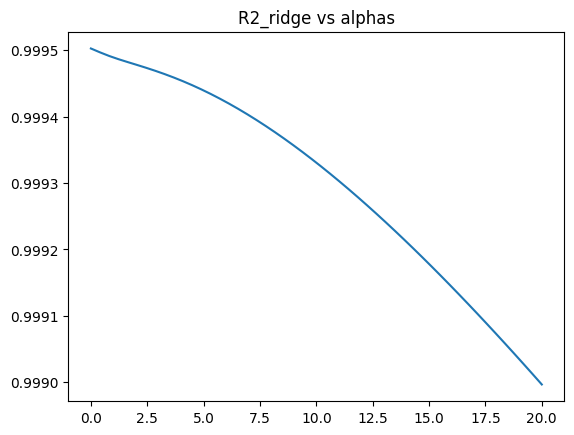

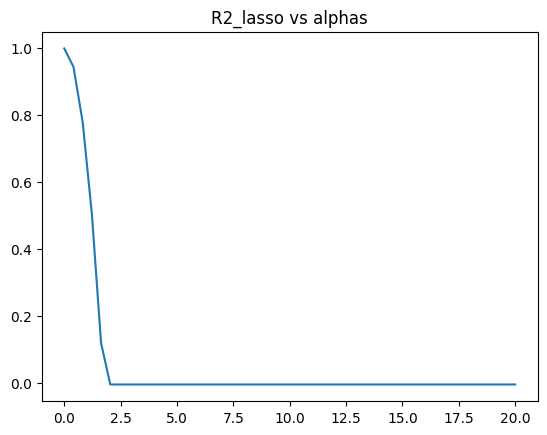

<Figure size 640x480 with 0 Axes>

In [26]:
plt.plot(alphas,r2_ridge)
plt.title("R2_ridge vs alphas")
plt.show()
plt.plot(alphas,r2_lasso)
plt.title("R2_lasso vs alphas")
plt.show()
plt.tight_layout()


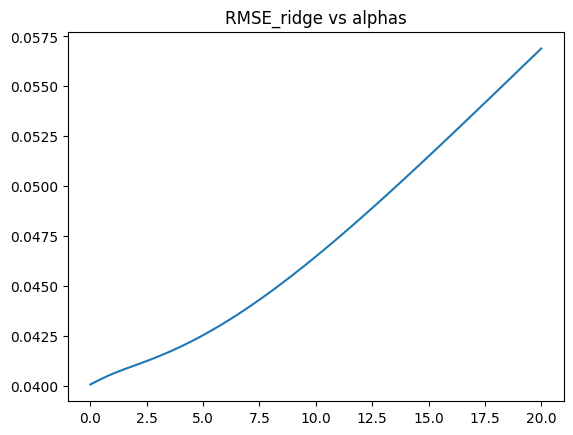

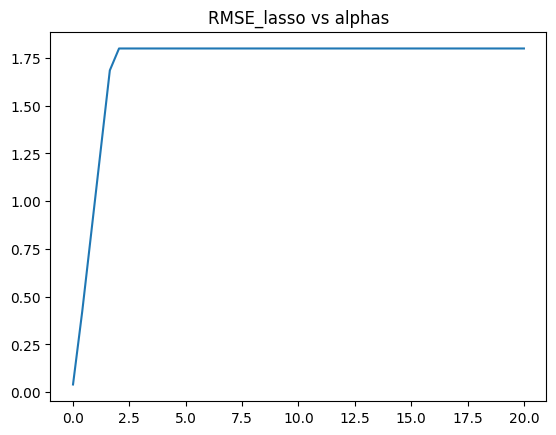

<Figure size 640x480 with 0 Axes>

In [27]:
plt.plot(alphas,rmse_ridge)
plt.title("RMSE_ridge vs alphas")
plt.show()
plt.plot(alphas,rmse_lasso)
plt.title("RMSE_lasso vs alphas")
plt.show()
plt.tight_layout()

finalmente podemos concluir que en ambos casos, un alpha menor nos dara los mejores resultados, ya que el R2 aumentara y el RSME disminuira.
obteniendo asi menosres diferencias entre los resultados de test y los predichos, ademas de que el modelo estara describiendo una mayor parte de los datos.